In [1]:
# check tensorflow installation
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.9.0
2.9.0


# Multilabel binary classification of clothing items

In [2]:
# download the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# check shape and type of the fashion mnist images
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
# create validation set and normalize datasets
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
print(X_valid.shape, y_valid.shape)
print(X_train.shape, y_train.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)


In [6]:
# the labels are integer. We define a list with the correspondance to the items' name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
# make a sequential neural network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))  # "relu" is the same as keras.activations.relu
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # multilabel classification

# the most conventional approach to accessing layer classes is with either of the two imports below:
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-20 15:22:26.862944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-20 15:22:26.863079: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# another way of defining the same model as before:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [10]:
# check summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# access the layers of a model
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
model.get_layer('dense') is hidden1  # get a layer by name or by index

True

In [14]:
# get weights and biases (initialized randomly)
weights, biases = hidden1.get_weights()
weights

array([[-0.07401992, -0.01039939,  0.06351386, ..., -0.05701116,
         0.07185274, -0.03741288],
       [-0.04006192,  0.07215273, -0.01226546, ..., -0.02449033,
         0.04004405,  0.01216774],
       [-0.0643293 ,  0.04707763,  0.01207864, ..., -0.04186329,
        -0.02154076, -0.04655381],
       ...,
       [-0.01353946, -0.04937848, -0.03476791, ...,  0.00862242,
         0.04171918, -0.00318261],
       [ 0.06377092, -0.01139251, -0.0244494 , ..., -0.04167296,
         0.01149528,  0.01930708],
       [-0.01607527, -0.0373765 ,  0.04335433, ..., -0.04963068,
         0.01649182, -0.06017939]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases  # initialized at 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

In [18]:
# compile (i.e. specify the loss function and optimizer)
model.compile(loss="sparse_categorical_crossentropy",  # equivalent to keras.losses.sparse_categorical_crossentropy
              optimizer='sgd',  # equivalent to keras.optimizers.SGD(lr=0.01)
              metrics=['accuracy'])  # equivalent to keras.metrics.sparse_categorical_accuracy

In [19]:
X_train.shape

(55000, 28, 28)

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))  # it is possible to give a fraction (e.g. 10%). Then, the validation set will be the last 10% of the input dataset.
# by default, the mini batches are of size 32, i.e., each feed forward iteration processes 32 samples at the time

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4129 - accuracy: 0.8550 - val_loss: 0.3954 - val_accuracy: 0.8648
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3933 - accuracy: 0.8613 - val_loss: 0.3850 - val_accuracy: 0.8666
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3763 - accuracy: 0.8671 - val_loss: 0.3856 - val_accuracy: 0.8658
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3628 - accuracy: 0.8708 - val_loss: 0.3655 - val_accuracy: 0.8696
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3515 - accuracy: 0.8753 - val_loss: 0.3765 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3409 - accuracy: 0.8791 - val_loss: 0.3467 - val_accuracy: 0.8784
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3319 - accuracy: 0.8822 - val_loss: 0.3524 - val_ac

In [23]:
# extract information from the fitting
print(history.params)
print(history.epoch)
print(history.history)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.41293466091156006, 0.3932664394378662, 0.37629979848861694, 0.3627535104751587, 0.3515051007270813, 0.34089621901512146, 0.33188343048095703, 0.32365530729293823, 0.31524455547332764, 0.308757483959198, 0.3016720116138458, 0.2950756251811981, 0.28881779313087463, 0.28421780467033386, 0.2784201502799988, 0.272870808839798, 0.26704344153404236, 0.26372694969177246, 0.2588581442832947, 0.25424104928970337, 0.25041258335113525, 0.2455909103155136, 0.24122105538845062, 0.23763969540596008, 0.23379367589950562, 0.22970573604106903, 0.22513073682785034, 0.2222691923379898, 0.21890926361083984, 0.21550530195236206], 'accuracy': [0.8549817800521851, 0.8612908720970154, 0.8671272397041321, 0.8707999587059021, 0.8752726912498474, 0.8791090846061707, 0.8822000026702881, 0.8847999572753906, 0.8877999782562256, 0.8898545503616333, 0.89

In [26]:
# plot performance during training
import pandas as pd
import matplotlib.pyplot as plt

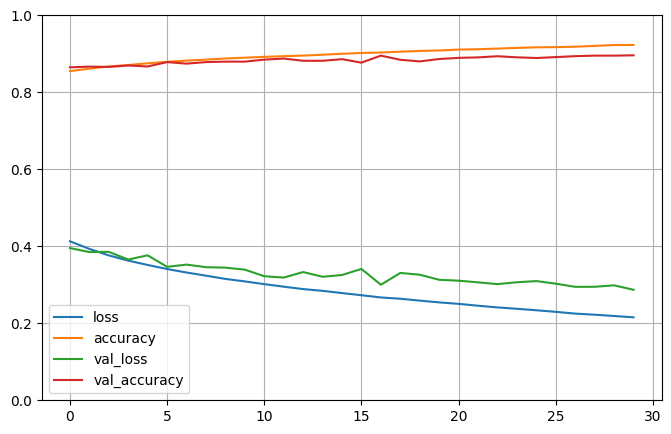

In [27]:
# the training and validation curves are close so there is not much overfitting
# when doing this learning plots, the curves should be shifted half an epoch to the left, or draw it as steps
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
# evaluate on the test set
model.evaluate(X_test, y_test)

 23/313 [=>............................] - ETA: 1s - loss: 50.7895 - accuracy: 0.8573

2023-02-20 15:38:52.708160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 57.9075 - accuracy: 0.8552


[57.90749740600586, 0.8552000522613525]

In [34]:
# make predictions on some test sampels
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba  # probabilities (in this example all probabilities are 0.0 or 1.0)

1/1 [==============================] - 0s 19ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
# predict classes (instead of probabilities)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(y_test[:3])

[9 2 1]
[9 2 1]


In [40]:
# get clothings name
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Regression of housing

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
# download dataset
housing = fetch_california_housing()

In [44]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [45]:
# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
# build the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [47]:
# compile
model.compile(loss='mean_squared_error', optimizer='sgd')

In [48]:
# fit
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


2023-02-20 16:12:02.656013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 0.8099

2023-02-20 16:12:04.667286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 0.8099 - val_loss: 0.5880
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5407 - val_loss: 0.5249
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4876 - val_loss: 0.5055
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5355 - val_loss: 0.7571
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5011 - val_loss: 0.4831
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4550 - val_loss: 0.4747
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4433 - val_loss: 0.4609
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4344 - val_loss: 0.4566
Epoch 9/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4303 - val_loss: 0.4518
Epoch 10/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4236 - val_loss: 0.4470
Epoch 11/2

In [51]:
# evaluate
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 1s 4ms/step - loss: 0.4096


0.40958231687545776

In [52]:
# predictions on "new" instances
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 24ms/step


array([[1.2954531],
       [2.434548 ],
       [1.9883425]], dtype=float32)